In [ ]:
# 필요한 라이브러리.

In [1]:
import pandas as pd
import warnings
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
# Data Load
TRAIN_PATH = './data/train.csv'
TEST_PATH = './data/test.csv'

df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

In [3]:
df_train.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [4]:
df_test.head()

,id,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
0,0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,...,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,...,0.333931,0.276307,0.211513,0.159223,0.110982,0.083130,0.099780,0.145420,0.260501,0.343857
2,2,0.490537,0.435958,0.413428,0.355796,0.335777,0.299944,0.242745,0.210555,0.180739,...,0.709371,0.746826,0.781436,0.788292,0.828630,0.835166,0.845859,0.846032,0.836724,0.846779
3,3,0.051634,0.075802,0.133983,0.154546,0.209387,0.251700,0.287552,0.333000,0.340617,...,0.075046,0.056651,0.079884,0.147469,0.213112,0.298096,0.382823,0.489381,0.562383,0.599247
4,4,0.154031,0.201728,0.270414,0.283799,0.343050,0.340233,0.379244,0.378511,0.373017,...,0.255070,0.242396,0.271287,0.328828,0.397950,0.486436,0.530573,0.582752,0.637296,0.637238


In [5]:
print(df_train.shape)
print(df_test.shape)

(810000, 230)
(10000, 227)


- test 데이터에 있는 id 값은 제외하고 사용해야함을 확인.

In [6]:
print(df_train['layer_1'].value_counts())
print('-----------------------------')
print(df_train['layer_2'].value_counts())
print('-----------------------------')
print(df_train['layer_3'].value_counts())
print('-----------------------------')
print(df_train['layer_4'].value_counts())
print('-----------------------------')

300    27000
290    27000
20     27000
30     27000
40     27000
50     27000
60     27000
70     27000
80     27000
90     27000
100    27000
110    27000
120    27000
130    27000
140    27000
150    27000
160    27000
170    27000
180    27000
190    27000
200    27000
210    27000
220    27000
230    27000
240    27000
250    27000
260    27000
270    27000
280    27000
10     27000
Name: layer_1, dtype: int64
-----------------------------
300    27000
290    27000
20     27000
30     27000
40     27000
50     27000
60     27000
70     27000
80     27000
90     27000
100    27000
110    27000
120    27000
130    27000
140    27000
150    27000
160    27000
170    27000
180    27000
190    27000
200    27000
210    27000
220    27000
230    27000
240    27000
250    27000
260    27000
270    27000
280    27000
10     27000
Name: layer_2, dtype: int64
-----------------------------
300    27000
290    27000
20     27000
30     27000
40     27000
50     27000
60     27000
70     27000


- 10~300 까지 10단위로 30개의 값들이 layer1 ~ layer4 모두 27000개씩 동일하게 있음.
- target의 class의 수가 30개로 꽤 많다고 보여지므로 회귀분석으로 접근한다.

In [7]:
pd.set_option('display.max_columns', 230)

df_train.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810

- 범위가 서로 다른 값들을 신경망에 입력하면, 신경망이 불균일한 데이터에 자동으로 적응할 수 있지만, <B> 학습이 더 어려워 질 수 있어 특징별로 정규화 </B> 하는 것이 좋음. 해당 데이터의 범위는 0~1 사이이므로 정규화 적응 유무 비교.

- 정규화할때 주의사항
> TRAIN 데이터를 사용하여 TEST데이터 정규화에 필요한 값의 범위를 결정함.

- 결측치확인

In [ ]:
#msno.matrix(df_train)

In [ ]:
#df_train.isnull().sum()[train.isnull().sum().values > 0]

In [8]:
#msno.matrix(df_test)
#df_test.isnull().sum()[test.isnull().sum().values > 0]

- 결측치 없음.

Text(0.5, 1.0, 'layer_4 heatmap')

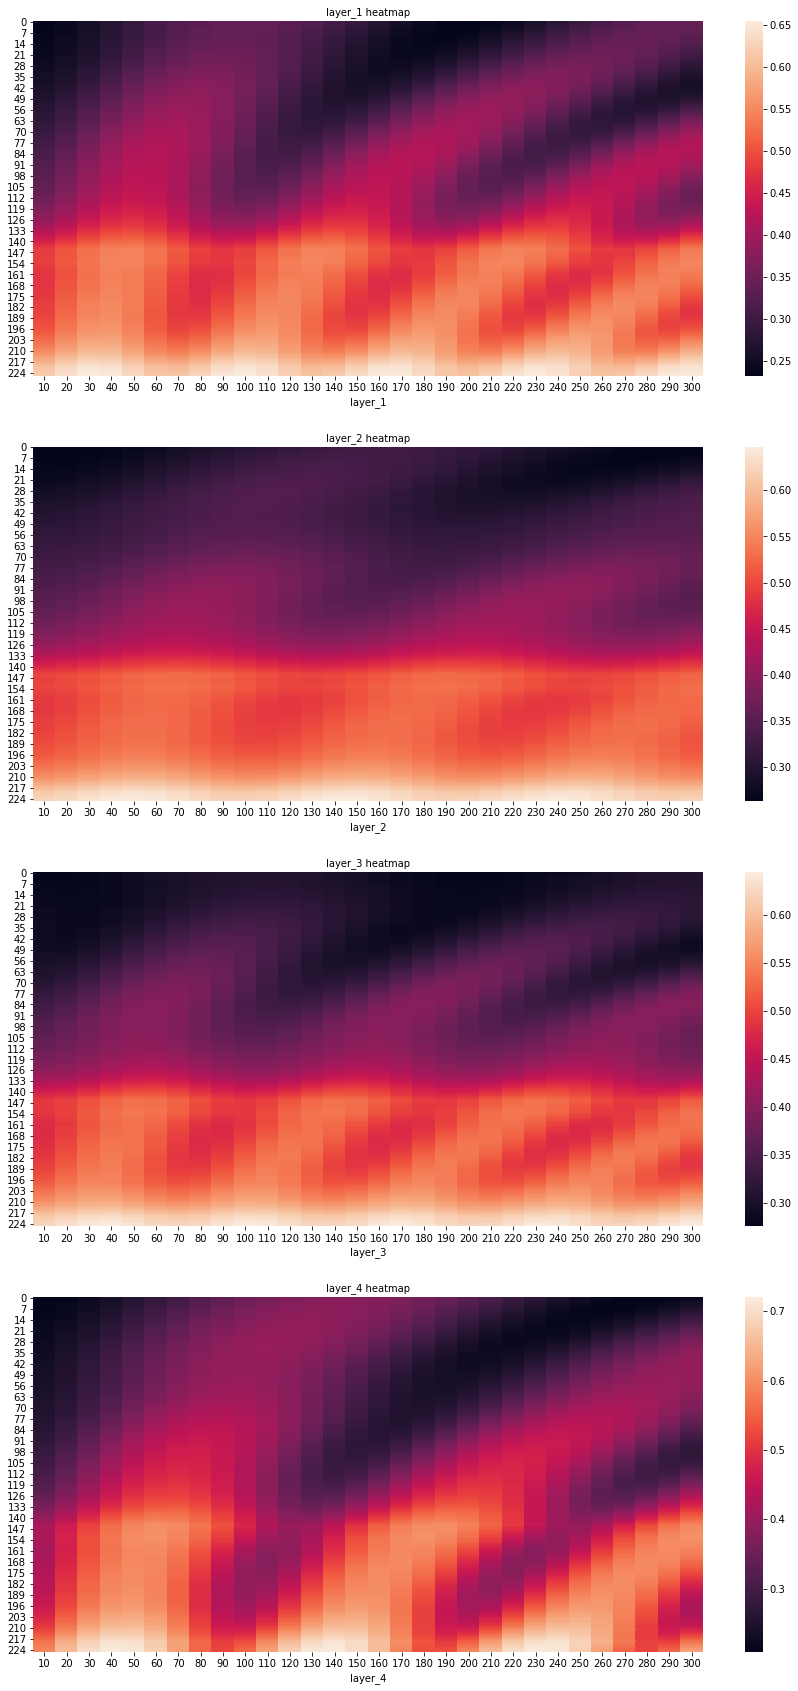

In [10]:
figure, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows = 4,ncols = 1)
figure.set_size_inches(15,30)

train_layer1 = df_train.drop(['layer_2','layer_3','layer_4'],axis=1).groupby(['layer_1']).mean()
train_layer2 = df_train.drop(['layer_1','layer_3','layer_4'],axis=1).groupby(['layer_2']).mean()
train_layer3 = df_train.drop(['layer_1','layer_2','layer_4'],axis=1).groupby(['layer_3']).mean()
train_layer4 = df_train.drop(['layer_1','layer_2','layer_3'],axis=1).groupby(['layer_4']).mean()

sns.heatmap(train_layer1.T,ax = ax1)
ax1.set_title('layer_1 heatmap',fontsize = 10)

sns.heatmap(train_layer2.T,ax = ax2)
ax2.set_title('layer_2 heatmap',fontsize = 10)

sns.heatmap(train_layer3.T,ax = ax3)
ax3.set_title('layer_3 heatmap',fontsize = 10)

sns.heatmap(train_layer4.T,ax = ax4)
ax4.set_title('layer_4 heatmap',fontsize = 10)

- layer의 두깨에 따라 증가하거나 감소하는 특정 패턴이 있다고 보이지는 않음.

In [12]:
#독립변수와 종속변수를 분리합니다.
train_X = df_train.iloc[:,4:]
train_Y = df_train.iloc[:,0:4]
test_X = df_test.iloc[:,1:]

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()  # model 초기화 
model.add(Dense(units=160, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dense(units=160, activation='relu'))   # 두번째 은닉층  
model.add(Dense(units=160, activation='relu'))   # 세번째 은닉층
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

In [14]:
#모델을 컴파일합니다.
# adam: momentum과 gradient 히스토리를 모두 고려하는 방식 
# adam 이 optimum을 지나쳤다가 다시 돌아오는 경우는 의도된 특성으로 velocity로 인한 문제.
# sharp minima는 지나치고 local minima or saddle point에 갇히지 않음. 
# sharp minima:loss fuction의 굴곡이 커서 학습과 테스트 시 조금만 어긋나도 성능이 급격하게 변하는 지점
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [15]:
#모델을 학습합니다.
model.fit(train_X, train_Y, epochs=20, batch_size=10000, validation_split = 0.05)

Epoch 1/20
77/77 [==============================] - 11s 65ms/step - loss: 121.2726 - mae: 121.2726 - val_loss: 94.6977 - val_mae: 94.6977
Epoch 2/20
77/77 [==============================] - 4s 53ms/step - loss: 74.9359 - mae: 74.9359 - val_loss: 94.2729 - val_mae: 94.2729
Epoch 3/20
77/77 [==============================] - 4s 55ms/step - loss: 74.3647 - mae: 74.3647 - val_loss: 93.3387 - val_mae: 93.3387
Epoch 4/20
77/77 [==============================] - 4s 52ms/step - loss: 73.3778 - mae: 73.3778 - val_loss: 92.4017 - val_mae: 92.4017
Epoch 5/20
77/77 [==============================] - 4s 54ms/step - loss: 72.2942 - mae: 72.2942 - val_loss: 91.0621 - val_mae: 91.0621
Epoch 6/20
77/77 [==============================] - 4s 53ms/step - loss: 70.3504 - mae: 70.3504 - val_loss: 89.5446 - val_mae: 89.5446
Epoch 7/20
77/77 [==============================] - 4s 53ms/step - loss: 66.6501 - mae: 66.6501 - val_loss: 85.4979 - val_mae: 85.4978
Epoch 8/20
77/77 [==============================] - 